In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%pwd

'/Users/dongzheng/Codes/PythonWorkspace/CSE5005-Project/pictures'

In [6]:
df_btc_price_1s=pd.read_csv("./prices_btc_1s.txt", sep="\s+", names=["timestamp", "price"])

df_btc_price_1s

,timestamp,price
0,1621357598,43471.12
1,1621357599,43454.97
2,1621357600,43459.46
3,1621357602,43463.00
4,1621357603,43454.97
...,...,...
210824,1621618170,36956.38
210825,1621618171,36956.38
210826,1621618172,36954.31
210827,1621618174,36948.84


In [15]:
df_btc_price_1s.iloc[df_btc_price_1s["price"].idxmin()]

timestamp    1.621430e+09
price        3.072455e+04
Name: 59139, dtype: float64

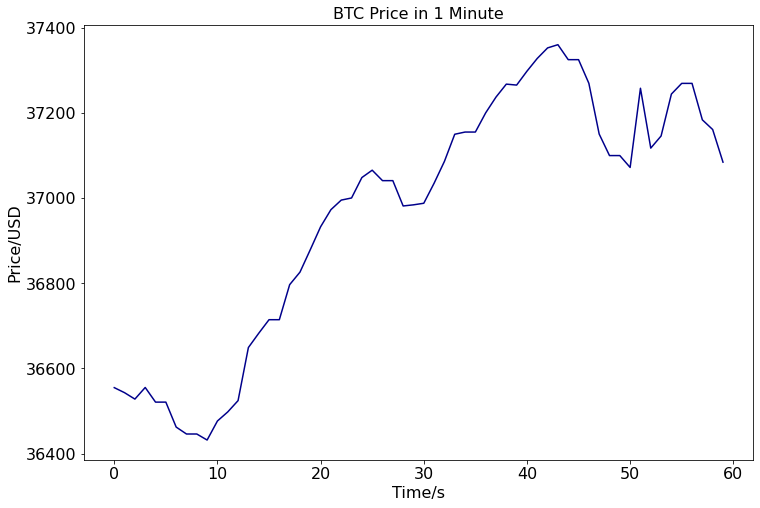

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(range(60), df_btc_price_1s[58800:58860]["price"], color="darkblue")
plt.title("BTC Price in 1 Minute", size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Time/s", size=16)
plt.ylabel("Price/USD", size=16)
plt.savefig("BTCPrice.png", dpi=300, bbox_inches="tight")
plt.show();